# Merge obtained data sets into one big file

Merge the data sets from the *code/data/filtered* directory into one big data set. You need to create *code/data/dataset* folder if it does not exist yet. All code *01* and *02* should be run before this.

In [1]:
import json
import pandas as pd

In [2]:
with open("data/filtered/abusive_hateful_spam_normal.json") as f:
    data1 = json.load(f)
    
data2 = pd.read_csv("data/filtered/hatespeech_profane_offensive.csv")
data3 = pd.read_csv("data/filtered/lol_cyberbullying.csv", sep = ";")
with open("data/filtered/racism_sexism_benevolent.json") as f1:
    data4 = json.load(f1) 
data5 = pd.read_csv("data/filtered/toxic_obscene_threat_insult_identity.csv")

In [3]:
# convert first json to pandas
texts = []
labels = []
for tweet in list(data1.values()):
    texts.append(tweet["text"])
    labels.append(tweet["label"])
data1 = pd.DataFrame({"text":texts, "label":labels})
data1

,text,label
0,fucks sake go away stupid anon — ^ https://t....,abusive
1,Damn dean just put Corbin to sleep. That Match...,abusive
2,@TheRealCamerota THAT BEER BUYING FREAKING IDI...,abusive
3,what idiot called them antacids and not afterb...,abusive
4,RT @gogglepossum: Don't you hate people that p...,abusive
...,...,...
13759,"In @RDispatches, @sunnivie asks whether ""relig...",hateful
13760,Pop Modern Silicone Cake Putty Spatula Bakewar...,spam
13761,Tired of empty jargon in the wide world of bio...,spam
13762,You could win a big screen TV! Enter now! #swe...,spam


In [4]:
# convert second json to pandas
texts = []
labels = []
for tweet in list(data4.values()):
    if tweet["label"] == "both":
        texts.append(tweet["text"])
        texts.append(tweet["text"])
        labels.append("racism")
        labels.append("sexism")
    else:
        texts.append(tweet["text"])
        labels.append(tweet["label"])

data4 = pd.DataFrame({"text":texts, "label":labels})



In [5]:
data4

,text,label
0,These girls are the equivalent of the irritati...,racism
1,Drasko they didn't cook half a bird you idiot ...,racism
2,Hopefully someone cooks Drasko in the next ep ...,racism
3,of course you were born in serbia...you're as ...,racism
4,So Drasko just said he was impressed the girls...,racism
...,...,...
6035,A man is as good as the woman he is with\n\n#A...,benevolent
6036,These woman are missed. My mother and her sist...,benevolent
6037,RT @GemmaAnneStyles: Happy #womensday to all m...,benevolent
6038,RT @ConstanceQueen8: #ADayWithoutWomen Trump W...,benevolent


In [6]:
texts = []
labels = []

texts.extend(data1["text"].tolist())
labels.extend(data1["label"].tolist())
texts.extend(data2["text"].tolist())
labels.extend(data2["label"].tolist())
cyber = data3["messages"].tolist()
texts.extend(cyber)
labels.extend(["cyberbulling"] * len(cyber))
texts.extend(data4["text"].tolist())
labels.extend(data4["label"].tolist())
texts.extend(data5["text"].tolist())
labels.extend(data5["label"].tolist())


In [7]:
df = pd.DataFrame({"text":texts, "label":labels})
df.head()

,text,label
0,fucks sake go away stupid anon — ^ https://t....,abusive
1,Damn dean just put Corbin to sleep. That Match...,abusive
2,@TheRealCamerota THAT BEER BUYING FREAKING IDI...,abusive
3,what idiot called them antacids and not afterb...,abusive
4,RT @gogglepossum: Don't you hate people that p...,abusive


In [8]:
df = df[df["label"].notna()]

In [9]:
labels = set(df["label"].tolist())
print(f"{len(labels)} unique labels: {labels}")

15 unique labels: {'spam', 'profane', 'sexism', 'threat', 'benevolent', 'obscene', 'insult', 'hateful', 'racism', 'identity', 'hate', 'offensive', 'toxic', 'cyberbulling', 'abusive'}


In [10]:
df.to_csv("dataset/data.csv", sep =  ";", index = False)

## Plot combined distribution

In [241]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np

In [242]:
df = pd.read_csv("dataset/data.csv", sep = ";")
df.head()

,text,label
0,fucks sake go away stupid anon — ^ https://t....,abusive
1,Damn dean just put Corbin to sleep. That Match...,abusive
2,@TheRealCamerota THAT BEER BUYING FREAKING IDI...,abusive
3,what idiot called them antacids and not afterb...,abusive
4,RT @gogglepossum: Don't you hate people that p...,abusive


In [243]:
labels, counts = np.unique(df["label"], return_counts = True)
counts

array([ 4227,  2339,   259,  1267,  1752,  1405,  7877,  8449,   522,
         760,   148,  3553,  7782,   478, 13699], dtype=int64)

In [244]:
labels

array(['abusive', 'benevolent', 'cyberbulling', 'hate', 'hateful',
       'identity', 'insult', 'obscene', 'offensive', 'profane', 'racism',
       'sexism', 'spam', 'threat', 'toxic'], dtype=object)

In [245]:
dataset = {
    'abusive' : 'AHS', 
    'benevolent': 'SRB', 
    'cyberbulling' : 'CYB', 
    'hate' : 'HPO', 
    'hateful' : 'AHS',
    'identity' : 'TOITI',
    'insult' : 'TOITI',
    'obscene' : 'TOITI', 
    'offensive' : 'HPO', 
    'profane' : 'HPO', 
    'racism' : 'SRB',
    'sexism' : 'SRB',
    'spam' : 'AHS',
    'threat' : 'TOITI',
    'toxic'  : 'TOITI'
}

groups = [dataset[lbl] for lbl in labels]
groups

['AHS',
 'SRB',
 'CYB',
 'HPO',
 'AHS',
 'TOITI',
 'TOITI',
 'TOITI',
 'HPO',
 'HPO',
 'SRB',
 'SRB',
 'AHS',
 'TOITI',
 'TOITI']

In [246]:
# color palette
cmap = plt.get_cmap("tab10")
rgbs = cmap.colors

groups_unique = np.unique(groups)
color_mapper = dict(zip(groups_unique, rgbs[:len(groups_unique)]))

In [247]:
labels = np.array(labels)
counts = np.array(counts)
groups = np.array(groups)

idx = np.argsort(counts)[::-1]
labels, counts, groups = labels[idx], counts[idx], groups[idx]

In [248]:
colors = [color_mapper[group] for group in groups]

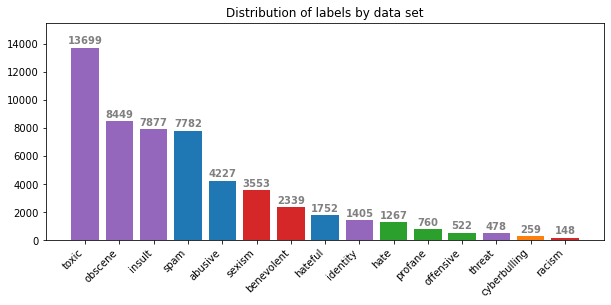

In [249]:
fig, ax = plt.subplots(figsize = (10,4))

ax.bar(labels, counts, color = colors)
ax.set_ylim([0, 15500])

for i, v in enumerate(counts):
    ax.text(i, v + 300, str(v), color="gray", fontweight='bold', ha = "center")
    
legend_patches = []
for key, value in color_mapper.items():
    legend_patches.append(mpatches.Patch(color=value, label=key))
plt.xticks(rotation=45, ha = "right")
plt.title("Distribution of labels by data set")

plt.show()

In [250]:
groups_size = dict(zip(groups_unique, [0] * len(groups_unique)))

for i in range(len(counts)):
    groups_size[groups[i]] += counts[i]
    
groups_size

{'AHS': 13761, 'CYB': 259, 'HPO': 2549, 'SRB': 6040, 'TOITI': 31908}

In [251]:
groups_sizes = [groups_size[group] for group in groups]
groups_sizes = np.array(groups_sizes)

In [252]:
idx = np.lexsort((counts, groups_sizes))[::-1]
labels, counts, groups, groups_sizes = labels[idx], counts[idx], groups[idx], groups_sizes[idx]
print(groups_sizes)
print(counts)

[31908 31908 31908 31908 31908 13761 13761 13761  6040  6040  6040  2549
  2549  2549   259]
[13699  8449  7877  1405   478  7782  4227  1752  3553  2339   148  1267
   760   522   259]


In [253]:
colors = [color_mapper[group] for group in groups]

In [254]:
groups

array(['TOITI', 'TOITI', 'TOITI', 'TOITI', 'TOITI', 'AHS', 'AHS', 'AHS',
       'SRB', 'SRB', 'SRB', 'HPO', 'HPO', 'HPO', 'CYB'], dtype='<U5')

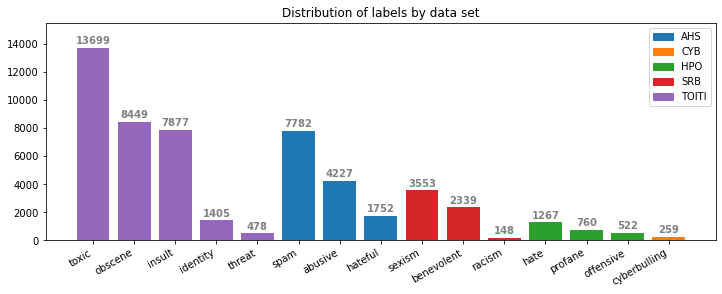

In [258]:
fig, ax = plt.subplots(figsize = (12,4))

ax.bar(labels, counts, color = colors)
ax.set_ylim([0, 15500])

for i, v in enumerate(counts):
    ax.text(i, v + 300, str(v), color="gray", fontweight='bold', ha = "center")
    
plt.xticks(rotation=30, ha = "right")
plt.title("Distribution of labels by data set")

legend_patches = []
for key, value in color_mapper.items():
    legend_patches.append(mpatches.Patch(color=value, label=key))
plt.legend(handles=legend_patches)

plt.show()